<a href="https://colab.research.google.com/github/JuanPaBL2/Data-Science-Machine-Learning-Proyects-Argentina-Programa-4.0-course-/blob/main/TP_4_An%C3%A1lisis_Dataset(Juan_Pablo_Del_Rosso).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESO DATASET IRIS (Teoria + codigo).

```
PROCESO DATASET SIN CODIGO (Teoria)
```


1. **IMPORTAR LIBRERIAS**: Pandas + Matplotlib


2. **CARGA DE DATOS**:
*   Cargar los datos , desde un CSV (Valores separados por coma)
*   Cargar el DATASET en un DATAFRAME
*   Mostrar la primera fila del DATAFRAME

3. **PREPROCESAMIENTO**:

* Limpieza: verificar la cantidad de valores nulos (valores vacios, corrompidos, que no sirven) en cada columna
* Eliminacion de las filas con valores nulos

* Obtener estadisticas descriptivas: Las estadísticas descriptivas incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos
  *  Valores Atipicos: valores lejos de otros valores en un conjunto de datos
4. **GRAFICA DATAFRAME** (Antes del Preprocesamiento)

5. **GRAFICA DATAFRAME LIMPIO** (Despues del Preprocesamiento)
6. **ANALISIS DE FRECUENCIA**: Se analiza el numero de veces que aparece un determinado valor, y se grafica.
7. **ANALISIS UNIVARIADO**: En este analisis se exploran caracteristicas INDIVIDUALES, y luego se grafican.
8.  **ANALISI MULTIVARIADO:** En este analisis se muestran las caracteristicas semejantes (relacionadas entre si), a traves del concepto:

   *     **Correlacion**: se grafica como se relacionan las distintas caracteristicas de diferentes elementos.

9. **PCA. MUESTREO:** Es un analisis de **PCA**(*componentes principales*) que busca reducir la dimensionalidad del DATASET, para visualizarlo en un espacio bidimensional.

  El PCA logra:

  *  Reduccion de datos
  *  Identificacion de patrones
  *  Calculo de vectores y valores propios
  *  Calcular tendencias

  MUESTREO: proceso en el que se seleccionan conjunto de elementos/individuos con el fin de estudiarlos y caracterizar el total. Utilizado en algun momento para censar.

```
PROCESO DATASET CON CODIGO (iris)
```










PRIMER FILA DATAFRAME

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa

VALORES NULOS

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

DATAFRAME LIMPIO

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2    

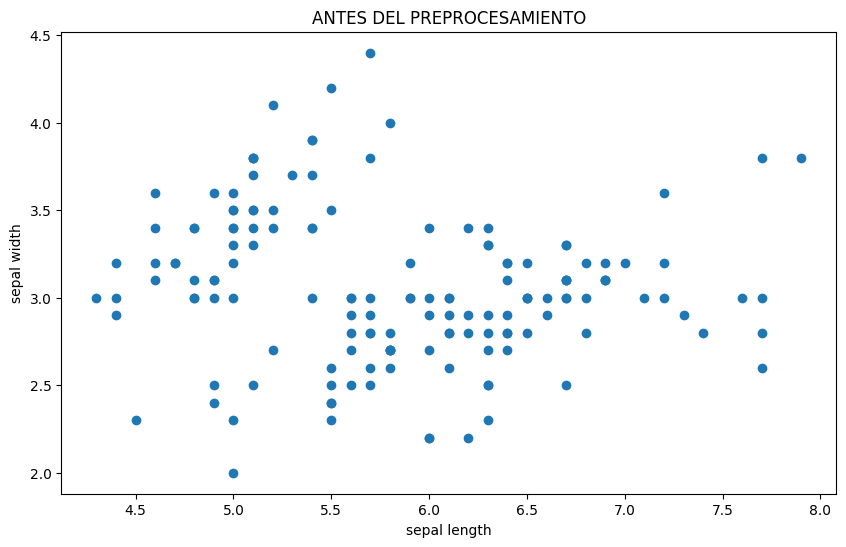

GRAFICO LIMPIO:


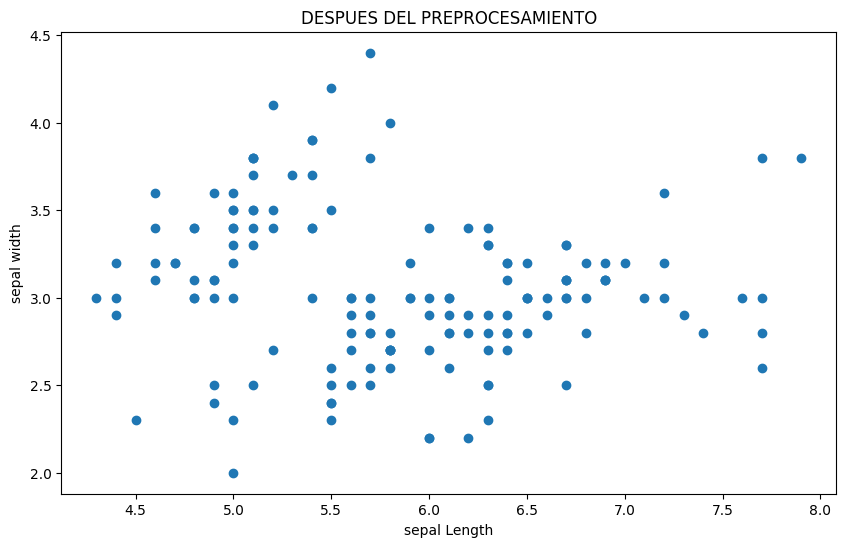

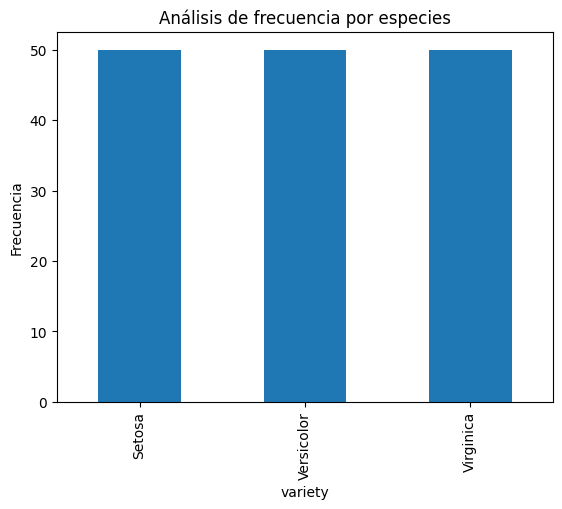

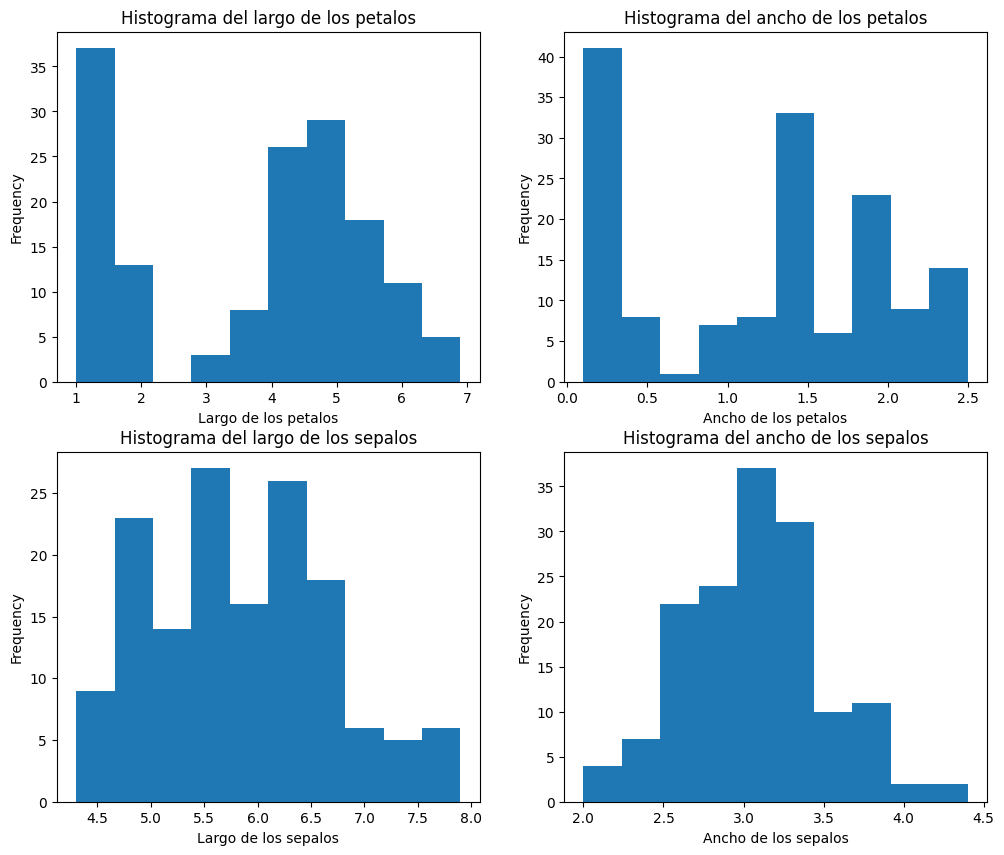

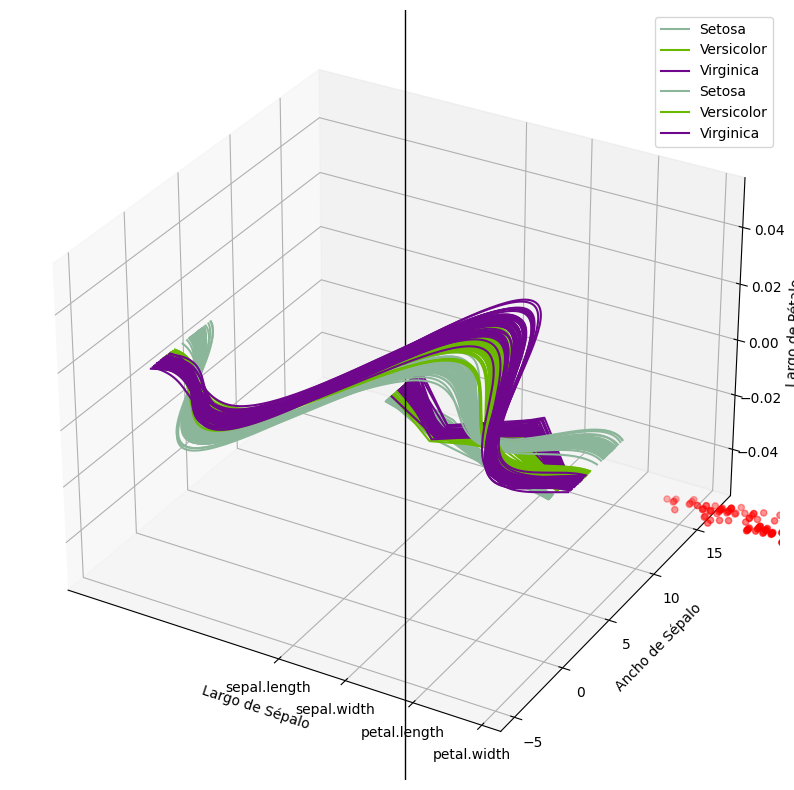

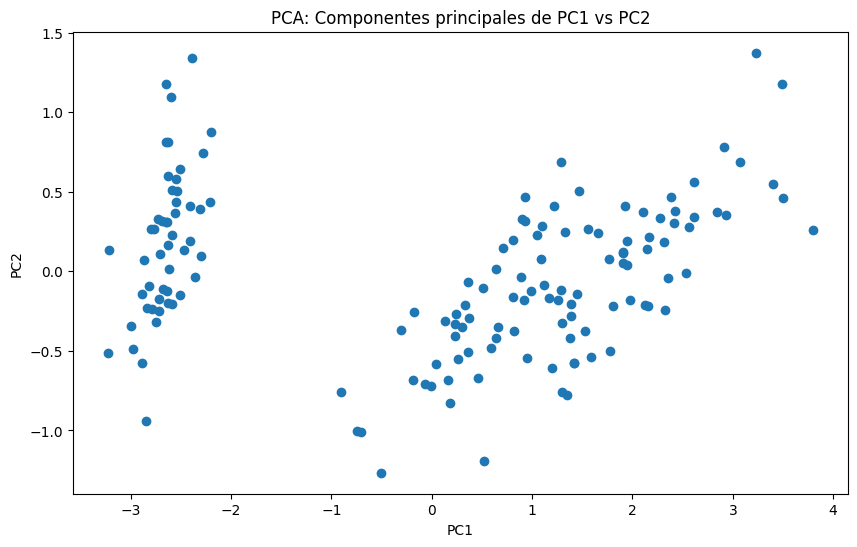

In [ ]:
#1.___________________________IMPORTAR LIBRERIAS________________________________

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D  # Visualizacion
from pandas.plotting import parallel_coordinates, andrews_curves  # Visualizacion

#2.______________________________CARGA DE DATOS:________________________________

urlCSV = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'  #---> creamos la variable con el link del CSV.


data_frame = pd.read_csv(urlCSV) #---> creamos el DATAFRAME a partir del DATASET, usando la funcion -pd.read_csv()- que importa un archivo CSV al formato DataFrame.

print("PRIMER FILA DATAFRAME")
print("")

print(data_frame.head(1)) #---> mostramos la primer fila del DATAFRAME, usando la funcion -.head()- donde colocamos el numero de la fila a mostrar.
print("")

#3._____________________________PREPROCESAMIENTO_________________________________
#LIMPIEZA:

print("VALORES NULOS")
print("")
nulos = data_frame.isnull().sum()  #---> arroja los valores nulos del dataframe.
print(nulos)
print("")

#ELIMINACION:
print("DATAFRAME LIMPIO")
print("")
data_frame_limpio = data_frame.dropna() #---> remueve los valores nulos del dataframe, usando la funcion -dropna()-
print(data_frame_limpio)
print("")

#ESTADISTICAS DESCRIPTIVAS
print("ESTADISTICAS DESCRIPTIVAS")
print("")
statics = data_frame_limpio.describe()  #---> usamos la funcion -describe()-, que devuelve la descripción de los datos en el DataFrame.
print(statics)
print("")

#4____________GRAFICA DATAFRAME ANTES DEL PREPROCESAMIENTO_______________________
print("GRAFICO SUCIO:")
plt.figure(figsize=(10, 6))
plt.scatter(data_frame['sepal.length'], data_frame['sepal.width']) #---> creamos grafico de dispersion, donde adjuntamos los valores del DATAFRAME "SUCIO" (sin preprocesar)

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('ANTES DEL PREPROCESAMIENTO')
plt.show()

#5.____________GRAFICA DATAFRAME DESPUES DEL PREPROCESAMIENTO___________________
print("GRAFICO LIMPIO:")
plt.figure(figsize=(10, 6))
plt.scatter(data_frame_limpio['sepal.length'], data_frame_limpio['sepal.width'])  #---> creamos grafico de dispersion, donde adjuntamos los valores del DATAFRAME LIMPIO (Preprocesado)

plt.xlabel('sepal Length')
plt.ylabel('sepal width')
plt.title('DESPUES DEL PREPROCESAMIENTO')
plt.show()
print("")

#6.________________________ANÁLISIS DE FRECUENCIA________________________________

data_frame['variety'].value_counts().plot(kind='bar')
plt.xlabel('variety')
plt.ylabel('Frecuencia')
plt.title("Análisis de frecuencia por especies")
plt.show()
print("")

#7.________________________ANÁLISIS UNIVARIADO__________________________________

plt.figure(figsize = (12,10))

#Datos de petalo
#Largo
plt.subplot(2, 2, 1)
data_frame['petal.length'].plot(kind='hist')
plt.xlabel('Largo de los petalos')
plt.title('Histograma del largo de los petalos')

#Ancho
plt.subplot(2, 2, 2)
data_frame['petal.width'].plot(kind='hist')
plt.xlabel('Ancho de los petalos')
plt.title('Histograma del ancho de los petalos')

#Datos de sepalo
#Largo
plt.subplot(2, 2, 3)
data_frame['sepal.length'].plot(kind='hist')
plt.xlabel('Largo de los sepalos')
plt.title('Histograma del largo de los sepalos')

#Ancho
plt.subplot(2, 2, 4)
data_frame['sepal.width'].plot(kind='hist')
plt.xlabel('Ancho de los sepalos')
plt.title('Histograma del ancho de los sepalos')

#8.________________________ANÁLISIS MULTIVARIADO________________________________
# Visualización de gráficos
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_frame['sepal.length'], data_frame['sepal.width'],  c='r', marker='o')
ax.set_xlabel('Largo de Sépalo')
ax.set_ylabel('Ancho de Sépalo')
ax.set_zlabel('Largo de Pétalo')

parallel_coordinates(data_frame, 'variety')  # Visualización Parallel Coordinates
andrews_curves(data_frame, 'variety')  # Visualización Andrews Curves

plt.show()
print("")

#9________________________ANALISIS PCA___________________________________________
#Extraemos las características: X
X= data_frame[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

#Aplicar PCA
pca=PCA(n_components=2)
principal_components=pca.fit_transform(X)

#Creamos el DATAFRAME con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['variety'] = data_frame['variety']

#Graficámos
plt.figure(figsize=(10,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Componentes principales de PC1 vs PC2')
plt.show()



# DATASET WINE

PRIMER FILA DATAFRAME 

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127      2.8        3.06   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  

 VALORES NULOS 

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64
DATAFRAME LIMPIO

     Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   


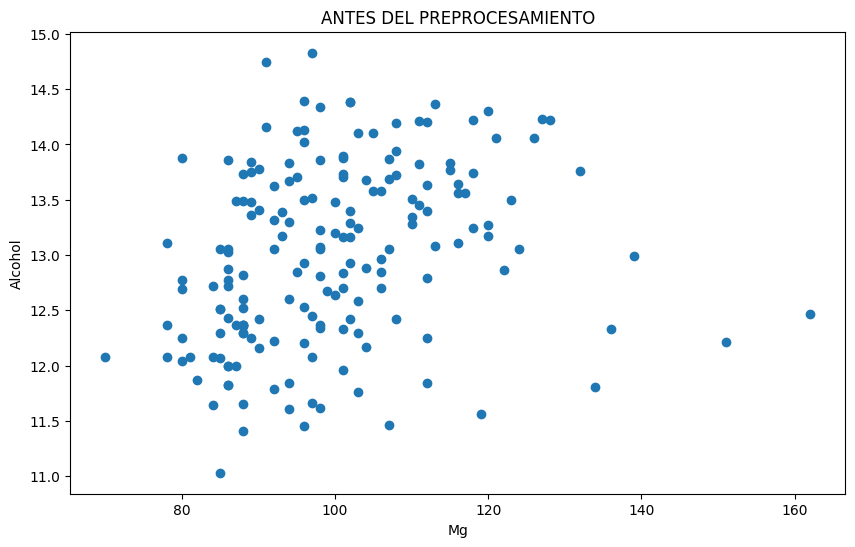




GRAFICO LIMPIO: DE ALCOHOL DE LOS VINOS VS SUS MG 



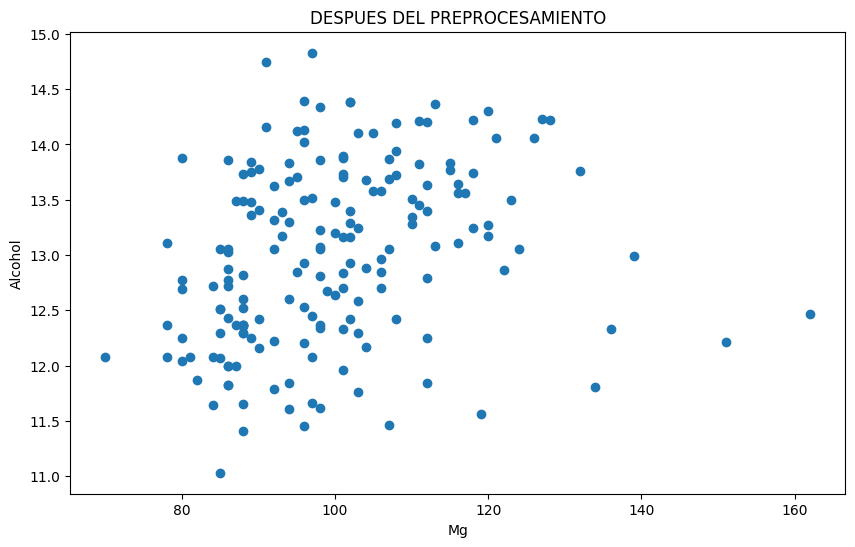


 COMO NO HUBO DATOS NULOS QUE ELIMINAR, LOS GRAFICOS SALIERON IGUALES 



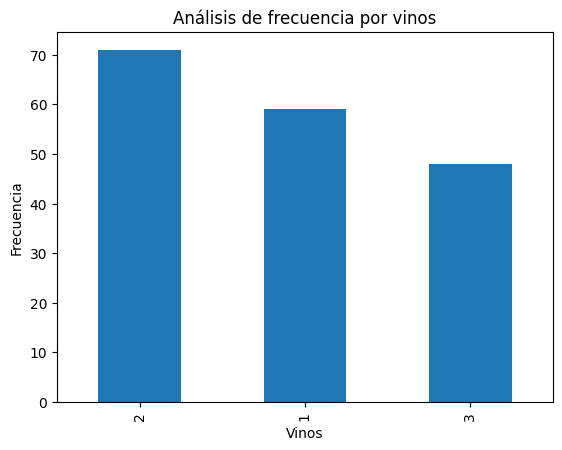

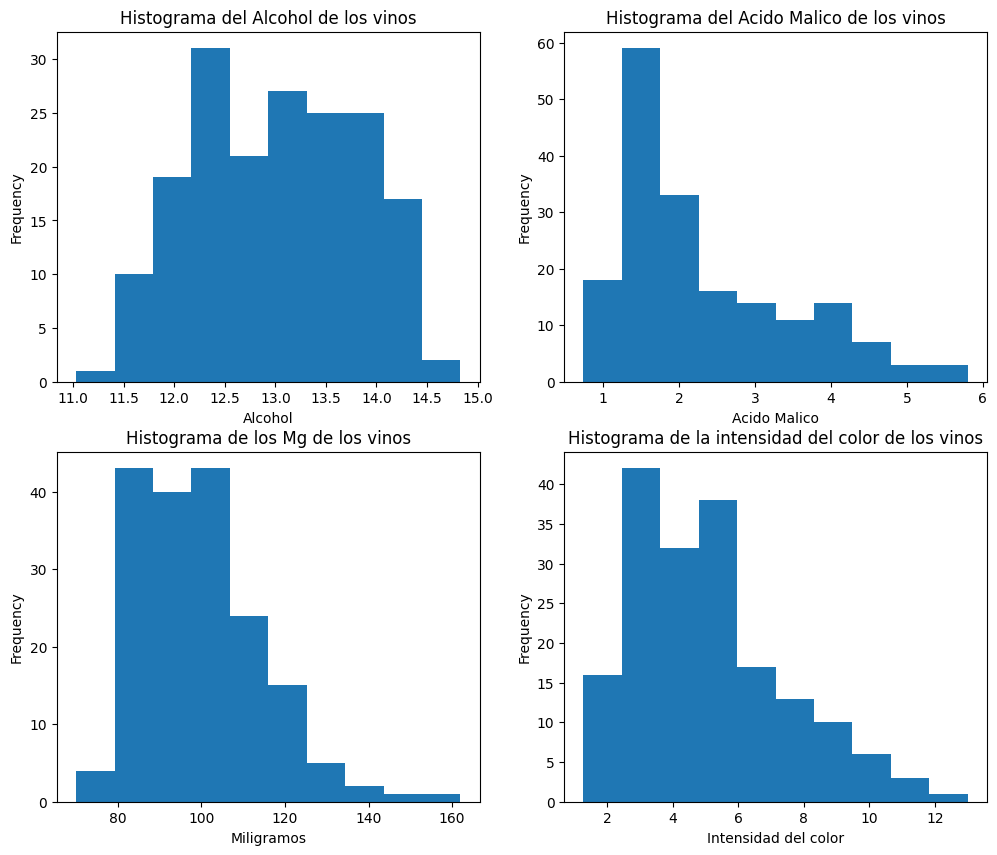

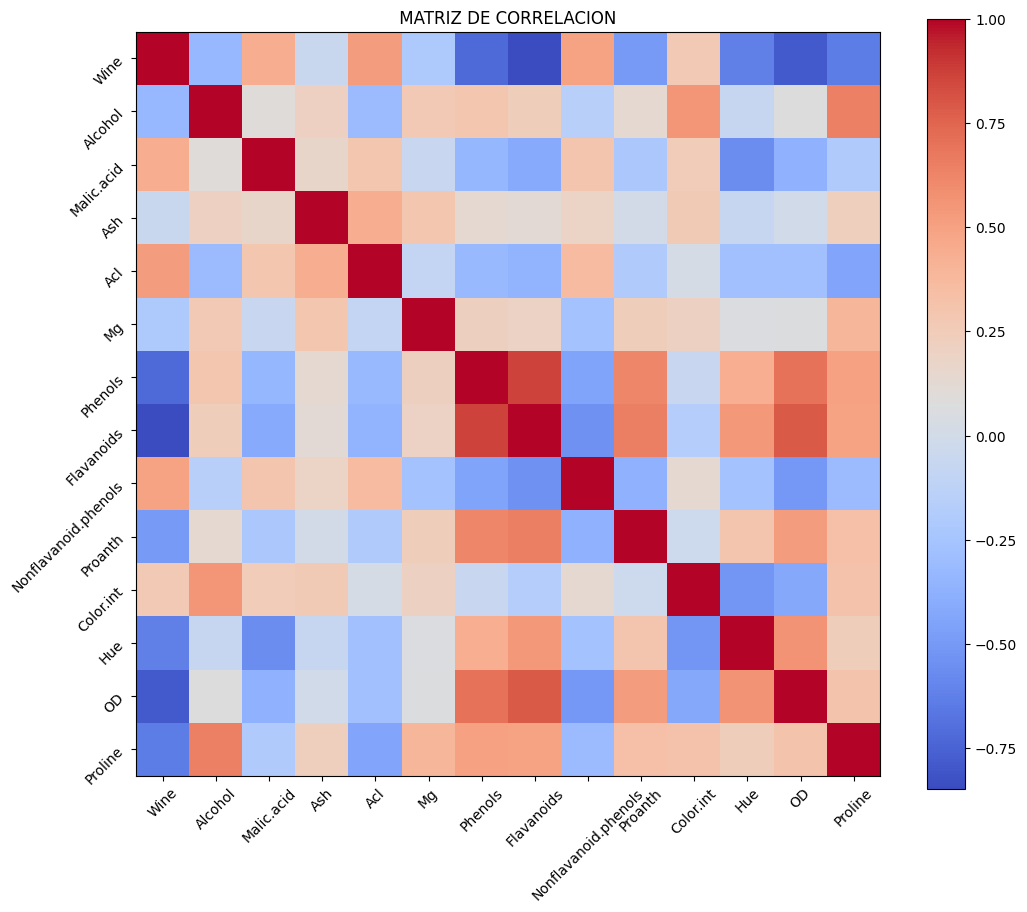

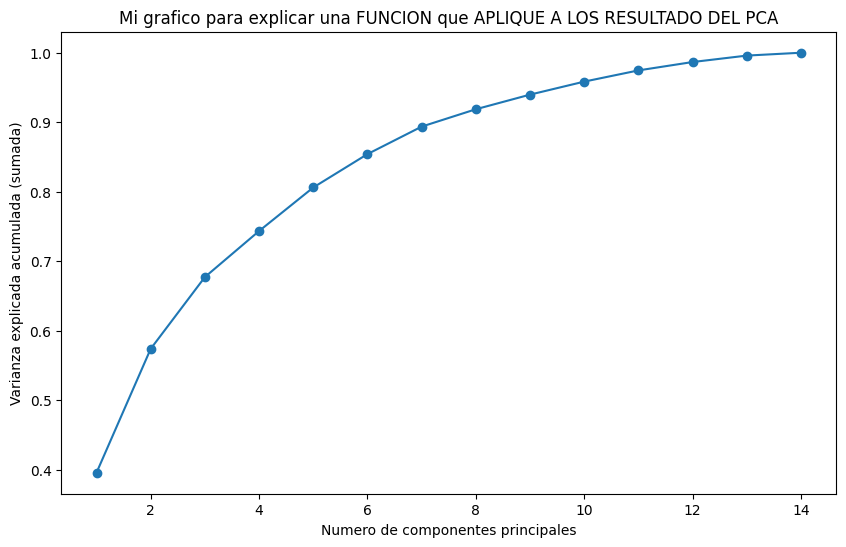

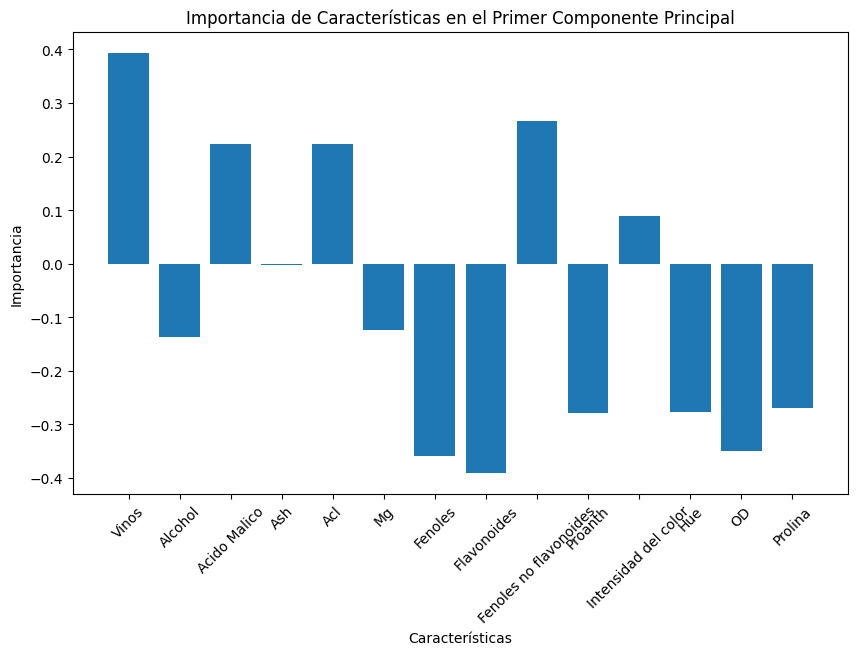




Contribuciones de Características en Cada Componente Principal:
   Vinos  Alcohol  Acido Malico   Ash   Acl    Mg  Fenoles  Flavonoides  \
0   0.39    -0.14          0.22 -0.00  0.22 -0.12    -0.36        -0.39   
1  -0.01    -0.48         -0.22 -0.32  0.01 -0.30    -0.07         0.00   

   Fenoles no flavonoides  Proanth  Intensidad del color   Hue    OD  Prolina  
0                    0.27    -0.28                  0.09 -0.28 -0.35    -0.27  
1                   -0.03    -0.04                 -0.53  0.28  0.16    -0.37  





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


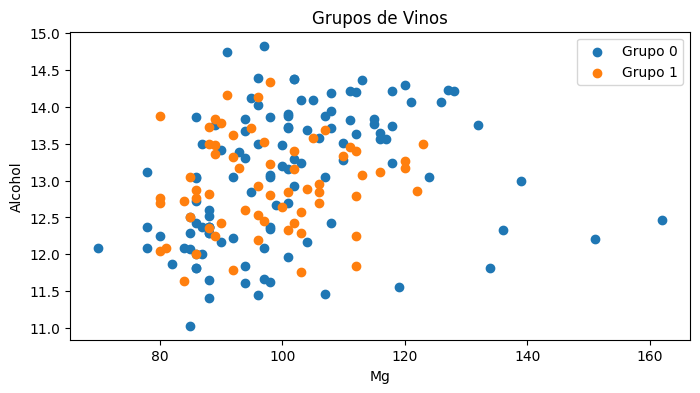

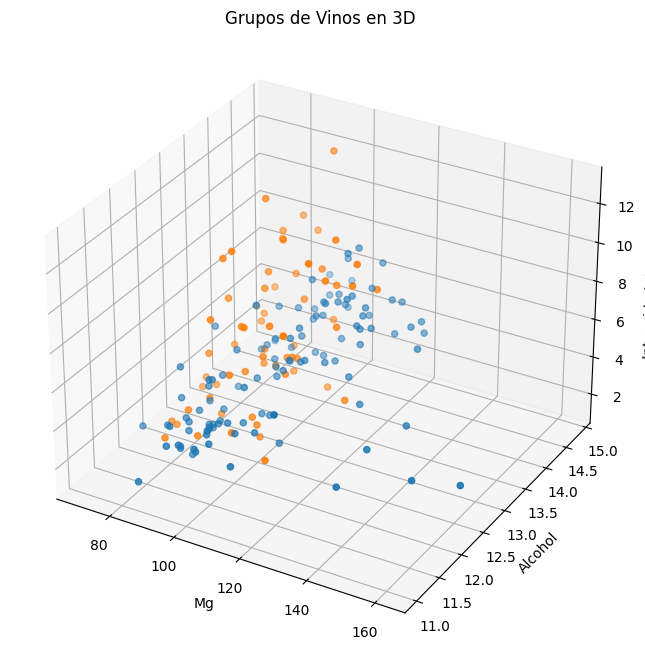




Nota de Silhouette: 0.29


In [ ]:
#1.IMPORTAR LIBRERIAS:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from pandas.plotting import radviz, parallel_coordinates, andrew_curves

#2.CARGA DE DATOS:

urlCSV = 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'  #---> creamos la variable con el link del CSV.

data_frame = pd.read_csv(urlCSV) #---> creamos el DATAFRAME a partir del DATASET, usando la funcion -pd.read_csv()- que importa un archivo CSV al formato DataFrame.

print("PRIMER FILA DATAFRAME \n")
print(data_frame.head(1)) #---> mostramos la primer fila del DATAFRAME, usando la funcion -.head()- donde colocamos el numero de la fila a mostrar.

#3. PREPROCESAMIENTO.
#LIMPIEZA:

print("\n VALORES NULOS \n")
nulos = data_frame.isnull().sum()  #---> arroja los valores nulos del dataframe.
print(nulos)

#ELIMINACION:
print("DATAFRAME LIMPIO\n")
data_frame_limpio = data_frame.dropna() #---> remueve los valores nulos del dataframe, usando la funcion -dropna()-
print(data_frame_limpio)

#ESTADISTICAS DESCRIPTIVAS
print("\n ESTADISTICAS DESCRIPTIVAS \n")
statics = data_frame_limpio.describe().round(2)  #---> usamos la funcion -describe()-, que devuelve la descripción de los datos en el DataFrame.
print(statics)

#4. GRAFICA DATAFRAME ANTES DEL PREPROCESAMIENTO
print("\nGRAFICO SUCIO: DE ALCOHOL DE LOS VINOS VS SUS MG \n")
plt.figure(figsize=(10, 6))
plt.scatter(data_frame['Mg'], data_frame['Alcohol'],) #---> creamos grafico de dispersion, donde adjuntamos los valores del DATAFRAME "SUCIO" (sin preprocesar)
plt.xlabel('Mg')
plt.ylabel('Alcohol')
plt.title('ANTES DEL PREPROCESAMIENTO')
plt.show()
print("\n\n")


#5. GRAFICA DATAFRAME DESPUES DEL PREPROCESAMIENTO
print("GRAFICO LIMPIO: DE ALCOHOL DE LOS VINOS VS SUS MG \n")
plt.figure(figsize=(10, 6))
plt.scatter(data_frame_limpio['Mg'], data_frame_limpio['Alcohol'])  #---> creamos grafico de dispersion, donde adjuntamos los valores del DATAFRAME LIMPIO (Preprocesado)
plt.xlabel('Mg')
plt.ylabel('Alcohol')
plt.title('DESPUES DEL PREPROCESAMIENTO')
plt.show()

print("\n COMO NO HUBO DATOS NULOS QUE ELIMINAR, LOS GRAFICOS SALIERON IGUALES \n")

#ANÁLISIS DE FRECUENCIA
data_frame['Wine'].value_counts().plot(kind='bar')
plt.xlabel('Vinos')
plt.ylabel('Frecuencia')
plt.title("Análisis de frecuencia por vinos")
plt.show()

print("\n\n")

#ANÁLISIS UNIVARIADO (para verificar las características individuales del dataset)
plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
data_frame['Alcohol'].plot(kind='hist')
plt.xlabel('Alcohol')
plt.title('Histograma del Alcohol de los vinos')

plt.subplot(2, 2, 2)
data_frame['Malic.acid'].plot(kind='hist')
plt.xlabel('Acido Malico')
plt.title('Histograma del Acido Malico de los vinos')

plt.subplot(2, 2, 3)
data_frame['Mg'].plot(kind='hist')
plt.xlabel('Miligramos')
plt.title('Histograma de los Mg de los vinos')

plt.subplot(2, 2, 4)
data_frame['Color.int'].plot(kind='hist')
plt.xlabel('Intensidad del color')
plt.title('Histograma de la intensidad del color de los vinos')
plt.show()

print("\n\n")


#ANALISIS MULTIVARIADO:

correlacion_matrix= data_frame_limpio.corr() #APLICAMOS FUNCION DE Correlacion:

#Graficamos CORRELACION:

plt.figure(figsize=(12,10))
plt.imshow(correlacion_matrix, cmap='coolwarm', interpolation= "nearest")
plt.colorbar()
plt.xticks(range(len(correlacion_matrix)), correlacion_matrix.columns, rotation=45)
plt.yticks(range(len(correlacion_matrix)), correlacion_matrix.columns, rotation=45)
plt.title(' MATRIZ DE CORRELACION ')
plt.show()

print("\n\n")

#Preprocesamiento de DATOS: Hacer ESTANDARIZACION
features_name= ['Vinos','Alcohol','Acido Malico','Ash','Acl','Mg','Fenoles','Flavonoides','Fenoles no flavonoides','Proanth','Intensidad del color','Hue','OD','Prolina']
scaler= StandardScaler() #Creamos una regla para ajustar los datos
vinos_scaled= scaler.fit_transform(data_frame_limpio) #Tranformar la TABLA estandarizada

#APLICAR PCA: Aplicar el calculo de los componentes principales
pca= PCA()
pca.fit(vinos_scaled)

#Aplicamos FUNCIONES para ANALIZAR: En este caso aplicaremos VARIANZA
explicacion_varianza= pca.explained_variance_ratio_
acumulacion_explicacion_varianza= np.cumsum(explicacion_varianza)

#Graficar la VARIANZA EXPLICADA COMULATIVA

plt.figure(figsize=(10,6))
plt.plot(range(1,len(acumulacion_explicacion_varianza)+1), acumulacion_explicacion_varianza, marker='o')
plt.xlabel('Numero de componentes principales')
plt.ylabel('Varianza explicada acumulada (sumada)')
plt.title('Mi grafico para explicar una FUNCION que APLIQUE A LOS RESULTADO DEL PCA')
plt.show()

print("\n\n")

#Numero de componentes principales a CAPTURAR o RETENER
numeros_de_componentes_a_capturar= 2
pca= PCA(n_components= numeros_de_componentes_a_capturar)
pca_frutas= pca.fit_transform(vinos_scaled)

#Analisis e interpretacion de los componentes principales
componentes= pca.components_

# Visualizar la importancia de las características en el primer componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(len(componentes[0])), componentes[0])
plt.xticks(range(len(componentes[0])),features_name, rotation=45)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características en el Primer Componente Principal')
plt.show()

print("\n\n")

# Obtener la lista de características con sus contribuciones a cada componente
feature_contributions=pd.DataFrame(componentes,columns=features_name)
print("Contribuciones de Características en Cada Componente Principal:")
print(feature_contributions.round(2))

print("\n\n")

# Cluster 2D
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
data_frame_limpio['Grupo'] = kmeans.fit_predict(vinos_scaled)

#Grafico 2D
plt.figure(figsize=(8, 4))
for grupo_id in range(num_clusters):
    grupo_data = data_frame_limpio[data_frame_limpio['Grupo'] == grupo_id]
    plt.scatter(grupo_data['Mg'], grupo_data['Alcohol'], label=f'Grupo {grupo_id}')

plt.xlabel('Mg')
plt.ylabel('Alcohol')
plt.title('Grupos de Vinos')
plt.legend()
plt.show()

print("\n\n")

#Grafico 3D
num_clusters = 3
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

for grupo_id in range(num_clusters):
    grupo_data = data_frame_limpio[data_frame_limpio['Grupo'] == grupo_id]
    ax.scatter(grupo_data['Mg'], grupo_data['Alcohol'], grupo_data['Color.int'], label=f'Grupo {grupo_id}')

ax.set_xlabel('Mg')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Intensidad del color')
plt.title('Grupos de Vinos en 3D')
plt.show()

print("\n\n")

#Nota del Grupo
silhouette_avg = silhouette_score(vinos_scaled, data_frame_limpio['Grupo'])
print(f"Nota de Silhouette: {silhouette_avg:.2f}")



# DATASET TITANIC

PRIMER FILA DATAFRAME 

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  

VALORES NULOS

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  F

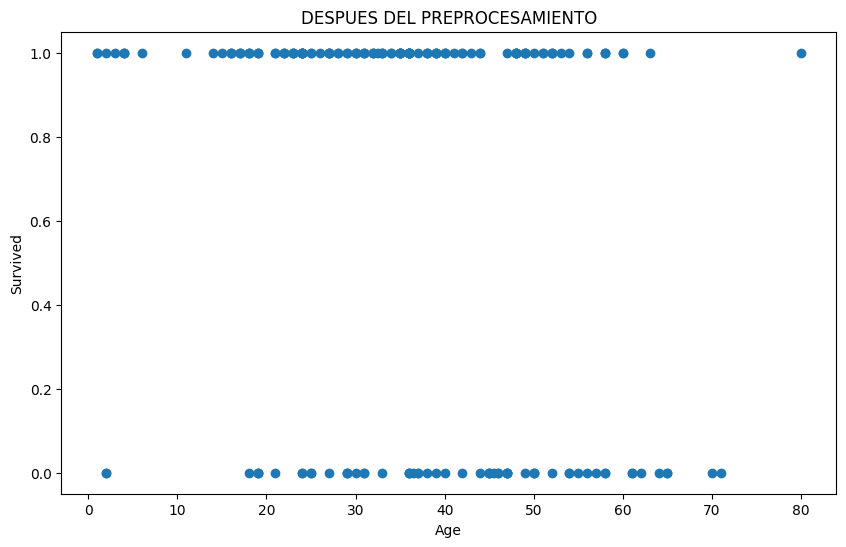

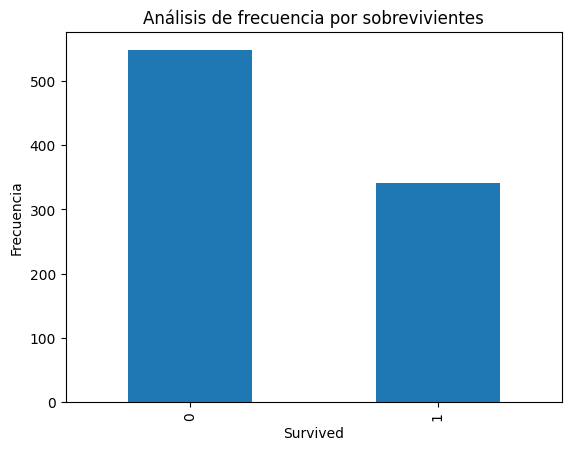

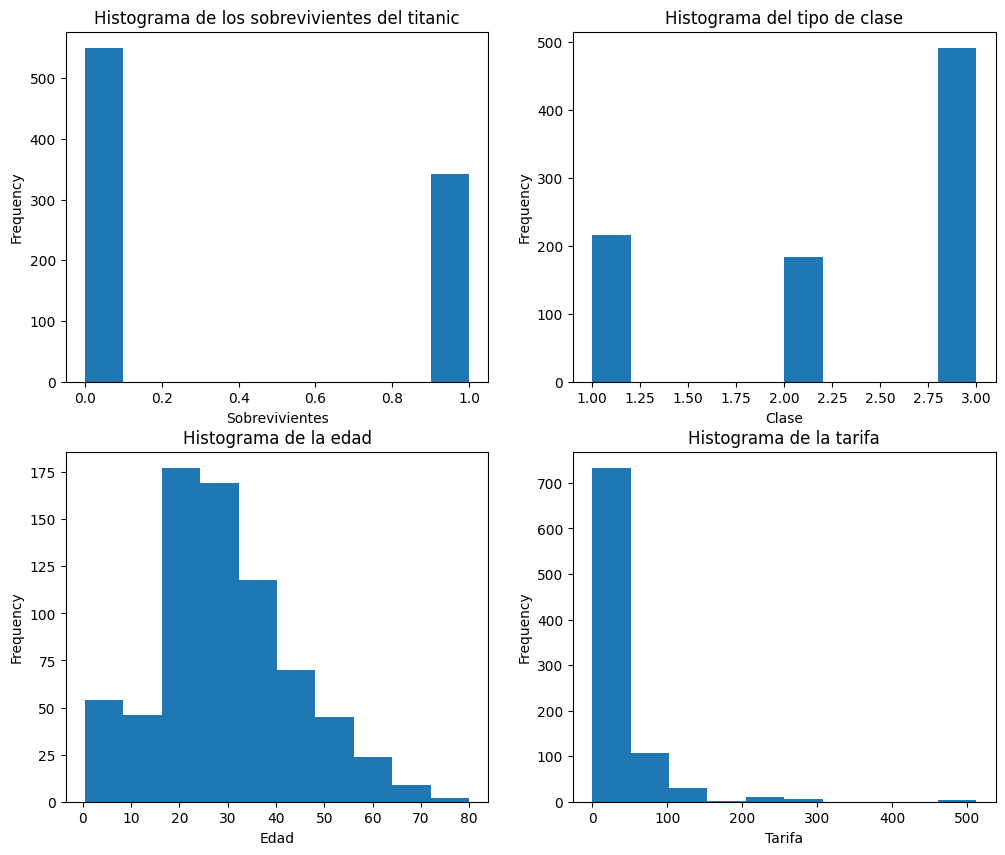

<ipython-input-1-fb38a58d4432>:112: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matrix= data_frame_limpio.corr() #APLICAMOS FUNCION DE Correlacion:


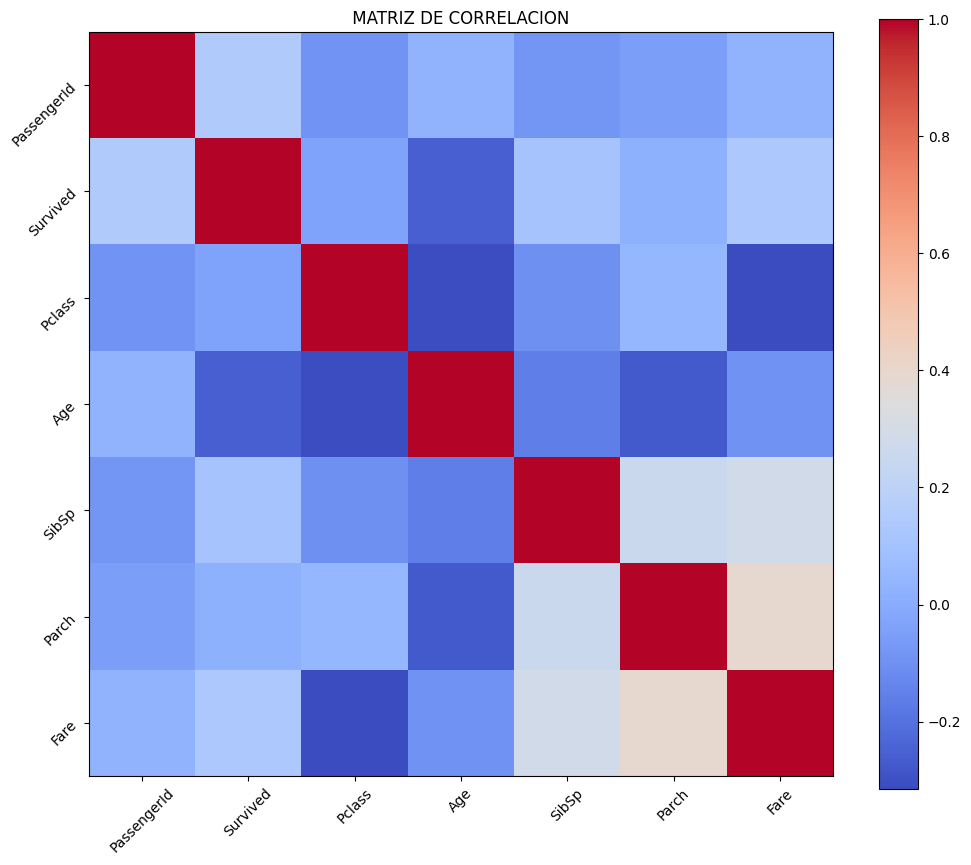

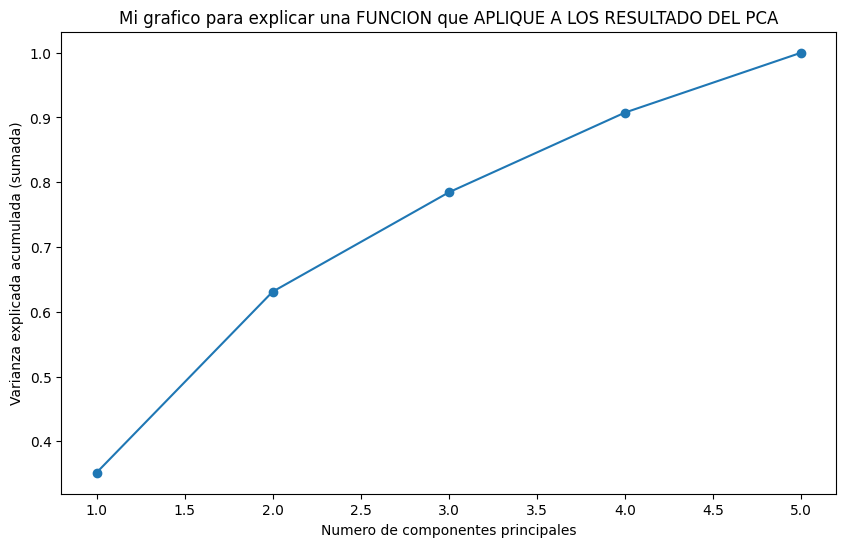

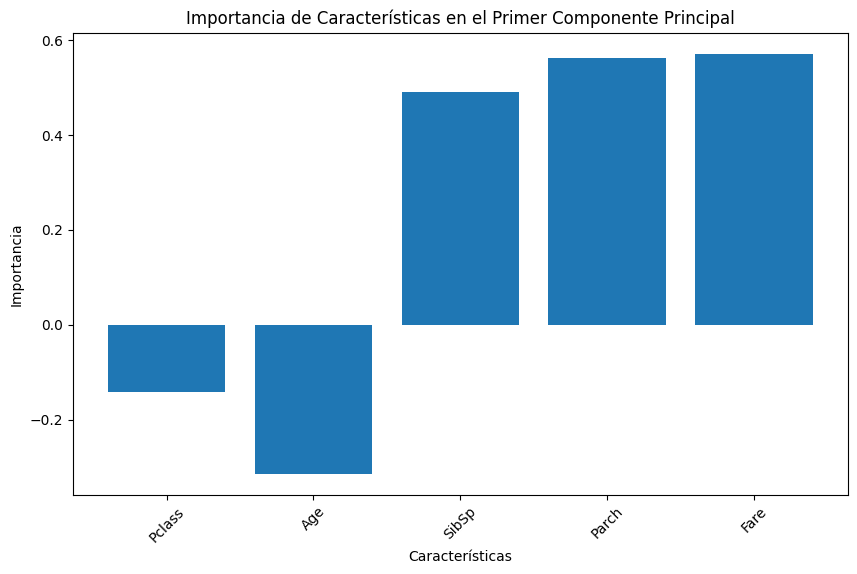




Contribuciones de Características en Cada Componente Principal:
   Pclass   Age  SibSp  Parch  Fare
0   -0.14 -0.31   0.49   0.56  0.57
1    0.72 -0.60  -0.05   0.18 -0.29


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-1-fb38a58d4432>:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_limpio.loc[:, 'Grupo'] = kmeans.fit_predict(barco_scaled)


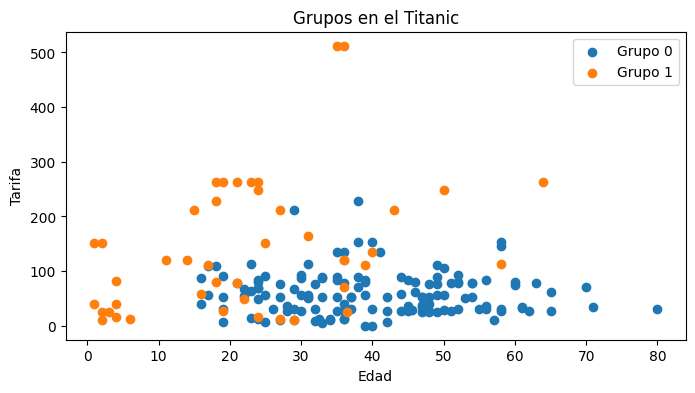

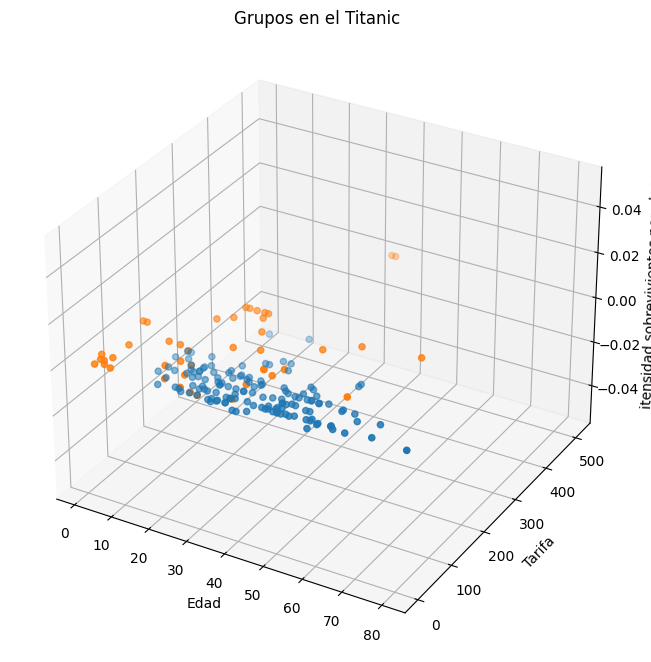




Nota de Silhouette: 0.37


In [ ]:
#1._________________IMPORTAR LIBRERIAS _____________________________________
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



#2._________________CARGA DE DATOS(crear DATAFRAME) ________________________

URL_csv = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

data_frame = pd.read_csv(URL_csv) #---> creamos el DATAFRAME a partir del DATASET, usando la funcion -pd.read_csv()- que importa un archivo CSV al formato DataFrame.

print("PRIMER FILA DATAFRAME \n")
print(data_frame.head(1)) #---> mostramos la primer fila del DATAFRAME, usando la funcion -.head()- donde colocamos el numero de la fila a mostrar.
print("")

#3. ________________PREPROCESAMIENTO________________________________________:
#LIMPIEZA:

print("VALORES NULOS")
print("")
nulos = data_frame.isnull()  #---> arroja los valores nulos del dataframe.
print(nulos)
print("")

#ELIMINACION:
print("DATAFRAME LIMPIO")
print("")
data_frame_limpio = data_frame.dropna() #---> remueve los valores nulos del dataframe, usando la funcion -dropna()-
print(data_frame_limpio)
print("")

#ESTADISTICAS DESCRIPTIVAS
print("ESTADISTICAS DESCRIPTIVAS")
print("")
statics = data_frame_limpio.describe()  #---> usamos la funcion -describe()-, que devuelve la descripción de los datos en el DataFrame.
print(statics)
print("")

"""
#4. _________GRAFICA DATAFRAME ANTES DEL PREPROCESAMIENTO_________
print("GRAFICO SUCIO:")
plt.figure(figsize=(10, 6))
#plt.scatter(data_frame['Cabin'], data_frame['Age']) #---> creamos grafico de dispersion, donde adjuntamos los valores del DATAFRAME "SUCIO" (sin preprocesar)

plt.xlabel('Age')
plt.ylabel('Cabin')
plt.title('ANTES DEL PREPROCESAMIENTO')
plt.show()

"""
print("GRAFICO SUCIO: COMO EL DATAFRAME CONTENIA VALORES NULOS, NO SE PUEDE GRAFICAR ANTES DE PROCESAR.")
print("\n\n")

#5.__________GRAFICA DATAFRAME DESPUES DEL PREPROCESAMIENTO____________________
print("GRAFICO LIMPIO: ")
plt.figure(figsize=(10, 6))
plt.scatter(data_frame_limpio['Age'], data_frame_limpio['Survived'])  #---> creamos grafico de dispersion, donde adjuntamos los valores del DATAFRAME LIMPIO (Preprocesado)

plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('DESPUES DEL PREPROCESAMIENTO')
plt.show()
print("")



#__________________ANÁLISIS DE FRECUENCIA ____________________________________
data_frame['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Frecuencia')
plt.title("Análisis de frecuencia por sobrevivientes")
plt.show()

print("\n\n")


#_________________ANÁLISIS UNIVARIADO__________________________________________
plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)  #plt.subplot: Agregue ejes a la figura actual o recupere ejes existentes.
data_frame['Survived'].plot(kind='hist')
plt.xlabel('Sobrevivientes')
plt.title('Histograma de los sobrevivientes del titanic')

plt.subplot(2, 2, 2)
data_frame['Pclass'].plot(kind='hist')
plt.xlabel('Clase')
plt.title('Histograma del tipo de clase')

plt.subplot(2, 2, 3)
data_frame['Age'].plot(kind='hist')
plt.xlabel('Edad')
plt.title('Histograma de la edad')

plt.subplot(2, 2, 4)
data_frame['Fare'].plot(kind='hist')
plt.xlabel('Tarifa')
plt.title('Histograma de la tarifa')

plt.show()
print("\n\n")

#____________________ANALISIS MULTIVARIADO ____________________________________

correlacion_matrix= data_frame_limpio.corr() #APLICAMOS FUNCION DE Correlacion:

#CORRELACION:

plt.figure(figsize=(12,10))
plt.imshow(correlacion_matrix, cmap='coolwarm', interpolation= "nearest")
plt.colorbar()
plt.xticks(range(len(correlacion_matrix)), correlacion_matrix.columns, rotation=45)
plt.yticks(range(len(correlacion_matrix)), correlacion_matrix.columns, rotation=45)
plt.title(' MATRIZ DE CORRELACION ')
plt.show()

print("\n\n")

#ESTANDARIZACION
features_name= ['Pclass','Age','SibSp','Parch','Fare'] #quitamos algunas columnas que tenian valores tipo string, para poder graficar correctamente
scaler = StandardScaler() # Creamos una regla para ajustar los datos
data_frame_numeric = data_frame_limpio[features_name]  # Filtramos solo las columnas numéricas
barco_scaled = scaler.fit_transform(data_frame_numeric) # Tranformar la TABLA estandarizada

#______________________PCA______________________________________________________
pca= PCA()
pca.fit(barco_scaled)

#________VARIANZA
explicacion_varianza= pca.explained_variance_ratio_
acumulacion_explicacion_varianza= np.cumsum(explicacion_varianza)

#_________Graficar la VARIANZA EXPLICADA COMULATIVA

plt.figure(figsize=(10,6))
plt.plot(range(1,len(acumulacion_explicacion_varianza)+1), acumulacion_explicacion_varianza, marker='o')
plt.xlabel('Numero de componentes principales')
plt.ylabel('Varianza explicada acumulada (sumada)')
plt.title('Mi grafico para explicar una FUNCION que APLIQUE A LOS RESULTADO DEL PCA')
plt.show()

print("\n\n")

#Numero de componentes principales a CAPTURAR o RETENER
numeros_de_componentes_a_capturar= 2
pca= PCA(n_components= numeros_de_componentes_a_capturar)
pca_frutas= pca.fit_transform(barco_scaled)

#Analisis e interpretacion de los componentes principales
componentes= pca.components_

# Visualizar la importancia de las características en el primer componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(len(componentes[0])), componentes[0])
plt.xticks(range(len(componentes[0])),features_name, rotation=45)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características en el Primer Componente Principal')
plt.show()

print("\n\n")

# Obtener la lista de características con sus contribuciones a cada componente
feature_contributions=pd.DataFrame(componentes,columns=features_name)
print("Contribuciones de Características en Cada Componente Principal:")
print(feature_contributions.round(2))

#___________________________CLUSTERIZACION______________________________________
# Cluster 2D
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
data_frame_limpio.loc[:, 'Grupo'] = kmeans.fit_predict(barco_scaled)

# Graficar los grupos en 2D
plt.figure(figsize=(8, 4))
for grupo_id in range(num_clusters):
    grupo_data = data_frame_limpio[data_frame_limpio.loc[:, 'Grupo'] == grupo_id]
    plt.scatter(grupo_data['Age'], grupo_data['Fare'], label=f'Grupo {grupo_id}')

plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Grupos en el Titanic')
plt.legend()
plt.show()

print("\n\n")

#Grafico 3D
num_clusters = 3
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

for grupo_id in range(num_clusters):
    grupo_data = data_frame_limpio[data_frame_limpio.loc[:, 'Grupo'] == grupo_id]
    ax.scatter(grupo_data['Age'], grupo_data['Fare'], label=f'Grupo {grupo_id}')

ax.set_xlabel('Edad')
ax.set_ylabel('Tarifa')
ax.set_zlabel('itensidad sobrevivientes por clase')
plt.title('Grupos en el Titanic ')
plt.show()

print("\n\n")

#Nota del Grupo
silhouette_avg = silhouette_score(barco_scaled, data_frame_limpio['Grupo'])
print(f"Nota de Silhouette: {silhouette_avg:.2f}")

